In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt

在插值这一章中，我们将介绍几个比较常用的个方法来做插值模拟。
再介绍这些方法之前我们先了解一下插值概念:
$$插值法是一种利用已知数据点来拟合未知数据点的方法，通过已知数据点的值和坐标，拟合出未知数据点的值和坐标。$$

在大致了解了基础概念后我们将插值分为了下面大致几类:$\\$
1、多项式插值$\\$
2、拉格朗日插值法$\\$
3、牛顿插值法$\\$
4、埃尔米特插值法$\\$
5、分段线性插值$\\$
6、样条插值$\\$

下面我将逐一介绍这些插值法 并 给出我自己的代码实现$\\$
1、多项式插值:
$$
A = 
\begin{pmatrix}
1 \quad x_0 \quad x_0^2 \quad \cdots \quad x_0^n \\
1 \quad x_1 \quad x_1^2 \quad \cdots \quad x_1^n \\
\vdots \\
1 \quad x_n \quad x_n^2 \quad \cdots \quad x_n^n \\
\end{pmatrix}

,

x = 
\begin{pmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n \\
\end{pmatrix}

b = 
\begin{pmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n \\
\end{pmatrix} 

\\
Ax = b
\\

\because 
\|A\| = 
\begin{vmatrix}
1 \quad x_0 \quad x_0^2 \quad \cdots \quad x_0^n \\
1 \quad x_1 \quad x_1^2 \quad \cdots \quad x_1^n \\
\vdots \\
1 \quad x_n \quad x_n^2 \quad \cdots \quad x_n^n \\
\end{vmatrix}为Vandermonde行列式，其值等于\prod_{i,j,i!=j} {(x_i - x_j)} \neq 0 ，所以Ax = b有唯一解
$$
此时其解可以通过解线性方程组得到。$\\$
tips:我们并不推荐直接求解矩阵的逆来解这个问题，因为当n很大的时候，Vandermonde矩阵的条件数很大，矩阵较为病态，矩阵稳定性很差，求解矩阵逆时会很慢，而且容易出错。


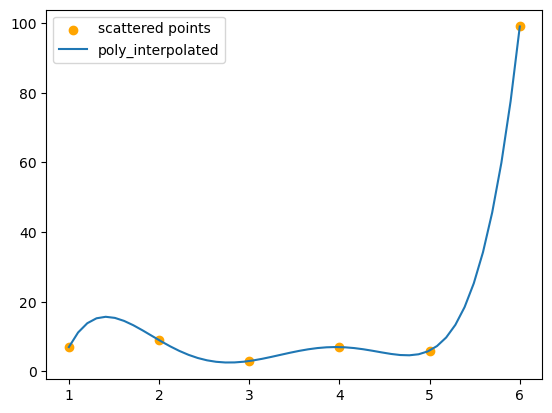

In [19]:
## 多项式插值法


def p(x,a:list):
    """
    :param x: 自变量
    :param a: 参数
    :return: 多项式函数
    """
    s = 0
    for i in range(len(a)):
        s += a[i] * x ** i
    return s


def poly_interpolate(x_in,y_in,x):
    """
    :param x_in: 自变量
    :param y_in: 因变量
    :param x: 待求解的自变量
    :return: 代入x的因变量
    """
    if len(x_in)!= len(y_in):
        print("Error: The number of x and y is not equal.")
        return
    
    n = len(x_in)

    A = []
    for i in range(n):           # 构造A
        A.append([])
        for j in range(n):
            if j == 0:
                A[i].append(1)
            else:
                A[i].append(x_in[i]**j)

    b = []
    for i in range(n):           # 构造b
        b.append(y_in[i])

    param = np.linalg.solve(A,b)   # 矩阵求解

    res =  p(x,param)

    return res

a = [1,2,3,4,5,6]
b = [7,9,3,7,6,99]

x = np.linspace(1,6)
y1 = list(map(lambda t:poly_interpolate(a,b,t),x))

plt.scatter(a,b,color = "orange")
plt.plot(x,y1)
plt.legend(["scattered points","poly_interpolated"])
plt.show()


拉格朗日插值法有三种形式:原型 Ⅰ型(参数型) Ⅱ型(重心坐标型)

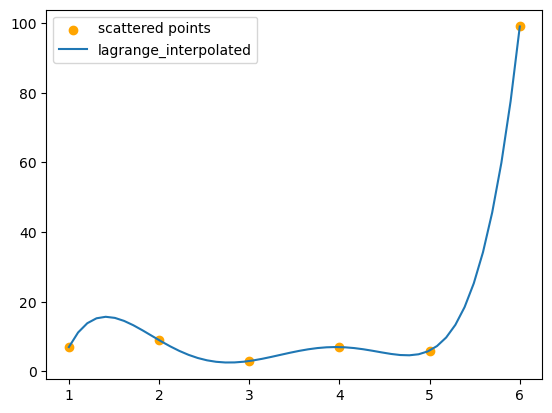

In [20]:
## 原型拉格朗日插值法

def lagrange(data,x, k):
    n = len(data)
    y = 1

    for i in range(n):
        if i != k:
            y = y*(x - data[i])/(data[k] - data[i])

    return y


def lagrange_interpolate(x_in,y_in,x):
    """
    x_in: x轴的值
    y_in: y轴的值
    x: 插值自变量
    """

    if len(x_in) != len(y_in):
        raise ValueError("The length of x_in and y_in should be equal")
        return 
    
    n = len(x_in)

    res = 0

    for i in range(n):
        res = res + lagrange(x_in,x,i)*y_in[i]


    return res


y2 = list(map(lambda t:lagrange_interpolate(a,b,t),x))

plt.scatter(a,b,color = "orange")
plt.plot(x,y2)
plt.legend(["scattered points","lagrange_interpolated"])
plt.show()

下面是拉格朗日插值法的重心坐标公式:
$$P_{n} = \frac{\sum_{k = 0}^{n} \frac{f_k}{(x - x_k) * \prod_{i = 0 and i != j}^{n}(x_k - x_i)}}{\sum_{k = 0}^{n} \frac{1}{(x - x_k) * \prod_{i = 0 and i != j}^{n}(x_k - x_i)}}$$

具体的推导过程从略

C:\Users\hasee\AppData\Local\Temp\ipykernel_20744\3293057739.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  div1 = div1 + y[i]/((x0 - x[i]) * param)
C:\Users\hasee\AppData\Local\Temp\ipykernel_20744\3293057739.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  div2 = div2 + 1 / ((x0 - x[i]) * param)
C:\Users\hasee\AppData\Local\Temp\ipykernel_20744\3293057739.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return div1 / div2


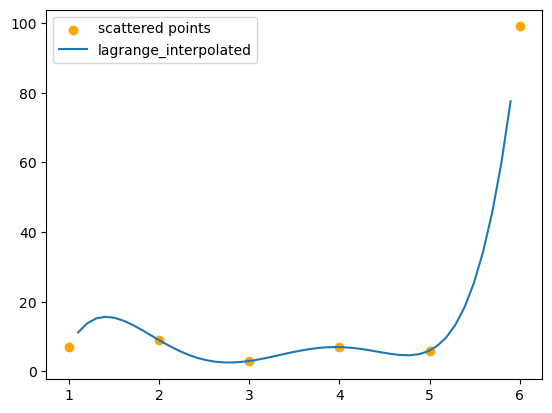

In [21]:
## 拉格朗日重心坐标型

def lagrange_gravery(x, y, x0):
    div1 = 0
    div2 = 0
    n = len(x)
    for i in range(n):
        param = 1

        if x0 == x[i]:
            pass
            
        for j in range(n):
            if i != j:
                param = param * (x[i] - x[j])

        div1 = div1 + y[i]/((x0 - x[i]) * param)
        div2 = div2 + 1 / ((x0 - x[i]) * param)

    return div1 / div2

y3 = list(map(lambda t: lagrange_gravery(a, b, t), x))

plt.scatter(a,b,color = "orange")
plt.plot(x,y3)
plt.legend(["scattered points","lagrange_interpolated"])
plt.show()

牛顿插值法类似于牛顿迭代法，是利用牛顿迭代法的思想，对多项式进行插值。
在插值过程中 不断的求解多项式函数的系数，从而得到一个满足要求的多项式函数。
而求解多项式函数的过程中用到了差商的概念:
$$Definition\quad \Delta f_{i}: \frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}$$

容易看出 差商这个概念具有很好的计算性质:便于迭代
所以我们可以采用多种方法计算机迭代得到差商

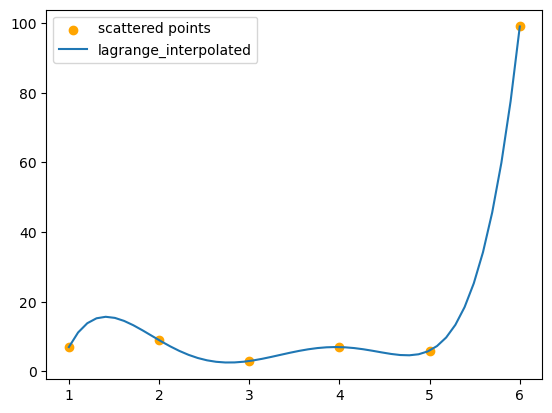

In [22]:
## 牛顿插值法

def difference_quotient_list(y_list,x_list = []):
    if x_list == []:
        x_list = [i for i in range(len(y_list))]
    prev_list = y_list
    dq_list = []
    dq_list.append(prev_list[0])
    for t in range(1,len(y_list)):
        prev,curr = 0,0  
        m = []
        k = -1
        for i in prev_list:
            curr = i
            m.append((curr - prev)/(x_list[k+t]-x_list[k]))
            prev = i
            k+=1
        m.pop(0)     
        prev_list = m
        dq_list.append(prev_list[0])
    return dq_list


def newton_interpolate(x_in,y_in,x):
    coef = difference_quotient_list(y_in,x_in)
    p = coef[0]
    for i in range(1,len(coef)):
        product = 1
        for j in range(i):
            product *= (x - x_in[j] )
        p += coef[i]*product
    return p

y4 = list(map(lambda t: newton_interpolate(a,b,t),x))

plt.scatter(a,b,color = "orange")
plt.plot(x,y4)
plt.legend(["scattered points","lagrange_interpolated"])
plt.show()

因为Hermite插值 lagrange插值等都有插值函数不光滑的缺陷,因此我们企图采用样条函数来解决这一问题,样条函数是具有多项式形式的曲线,并且在每个节点处都具有多项式函数,因此三次样条函数的多项式形式为:
$$
S(x) = -M_{j} \frac{(x_{j+1} - x)^2}{2h_j} + M_{j+1} \frac{(x - x_j)^2}{2h_j} + (y_j - \frac{M_{j} h_{j}^2}{6})\frac{x_{j+1} - x}{h_j} + (y_{j+1} - \frac{M_{j+1} h_{j}^2}{6})\frac{x - x_j}{h_j}
\\
$$
式中各个未知量表示为:
$$
h_j = x_{j+1} - x_j , M_j{\text 为S''(x)的线性系数} \quad 
$$

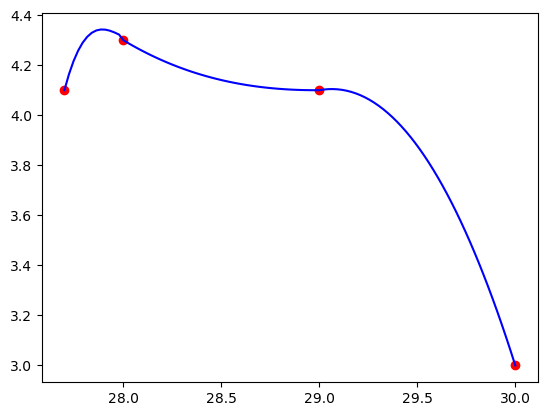

In [23]:
def div_value(xin,yin,i,j):    
    '''
    差商计算
    '''
    return (yin[i] - yin[j])/(xin[i]-xin[j])

def spline(xin,yin,x,partial_y = [0,0]):
    '''三次样条插值(边界点导数值)'''

    n = len(xin)
    
    o = np.zeros((n,n))

    H = list()
    for i in range(n-1):
        H.append(xin[i+1]-xin[i])


    lambdat = list()

    lambdat.append(1)

    miut = list()
    d = list()

    d.append(6 * (((yin[1] - yin[0])/(xin[1] - xin[0])) - partial_y[0])/H[0])

    for i in range(1,n-1):
        miut.append(H[i-1] / (H[i-1] + H[i]))
        lambdat.append(H[i] / (H[i] + H[i-1]))
        d.append(6*(div_value(xin,yin,i,i+1) - div_value(xin,yin,i-1,i)) / (H[i] + H[i-1]))

    miut.append(1)
    d.append(6*(partial_y[1] - div_value(xin,yin,n-2,n-1))/H[n-2])


    for i in range(n):
        for j in range(n):
            if j == i+1:
                o[i][j] = lambdat[i]
            elif j == i-1:
                o[i][j] = miut[j]
            elif j == i:
                o[i][j] = 2.0
            else:
                o[i][j] = 0


    d_array = np.array(d).reshape(-1,1)

    M = np.linalg.solve(o,d_array)

    for i in range(n-1):
        if x >= xin[i] and x<=xin[i+1]:
            res = M[i]*((xin[i+1] - x)**3 / (6*H[i])) + \
                  M[i+1] * ((x-xin[i])**2) / (6*H[i]) + \
                  (yin[i] - M[i]*(H[i]**2) / 6)*((xin[i+1] - x)/H[i]) + \
                  (yin[i+1] - M[i+1]*(H[i]**2) / 6)*((x-xin[i])/H[i])
            return res



xt = [27.7,28,29,30]
yt = [4.1,4.3,4.1,3.0]
partial_y = [3.0,-4.0]

xp = np.linspace(27.7,30.0,100)
y = list(map(lambda t: spline(xt,yt,t,partial_y),xp))

plt.scatter(xt,yt,color = "Red")
plt.plot(xp,y,color = "Blue")
plt.show()

Problem 2.1\
已知:$$x = [0.2,0.4,0.6,0.8,1.0],y = [0.98,0.92,0.81,0.64,0.38]$$
试用四次牛顿插值多项式$P_4(x)$和三次样条插值$S(x)$(自然边界条件)对数据进行插值。\
用图给出${(x_i,y_i),x_i = 0.2 + 0.08i,i = 0,1,11,10},P_4(x) {\text 及} S(x)$

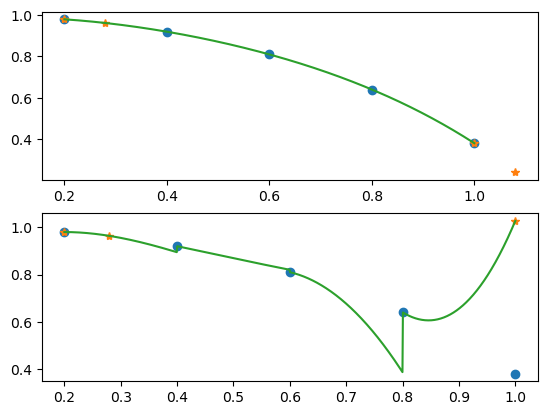

In [24]:
x_to = [0.2,0.4,0.6,0.8,1.0]
y_to = [0.98,0.92,0.81,0.64,0.38]

params = [0,1,11,10]

x_points = [0.2 + 0.08 * i for i in params]
y_to_newton_points = list()
y_to_cubic_points = list()

x_to_lin = np.linspace(0.2,1,1000)

#牛顿法
y_to_newton = list(map(lambda t: newton_interpolate(x_to,y_to,t),x_to_lin))

for i in x_points:
    y_to_newton_points.append(newton_interpolate(x_to,y_to,i))

#三次样条法
y_to_cubic = list(map(lambda t: spline(x_to,y_to,t),x_to_lin))

for i in x_points:
    y_to_cubic_points.append(spline(x_to,y_to,i))


plt.subplot(2,1,1)
plt.plot(x_to,y_to,'o',label = 'data')
plt.plot(x_points,y_to_newton_points,'*',label = 'newton_interp_points')
plt.plot(x_to_lin,y_to_newton,'-',label = 'newton_curve')

plt.subplot(2,1,2)
plt.plot(x_to,y_to,'o',label = 'data')
plt.plot(x_points,y_to_cubic_points,'*',label = 'cubic_interp_points')
plt.plot(x_to_lin,y_to_cubic,'-',label = 'cubic_curve')